In [554]:
import pandas as pd
import numpy as np

### Data preprocessing

In [557]:
data = pd.read_csv('final_data.csv')

In [558]:
data.head()

,Unnamed: 0,date,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate,Dataflow,Mortgage Delinquency Rate,DSR
0,0,2005-01-01,5.3,1.97,12767.286,141.0,5.6,11.0,1.42,13.1
1,1,2005-01-01,5.3,1.97,12767.286,101.6,5.6,11.0,1.42,13.1
2,2,2005-01-01,5.3,1.97,12767.286,99.9,5.6,11.0,1.42,13.1
3,3,2005-01-01,5.3,1.97,12767.286,98.6,5.6,11.0,1.42,13.1
4,4,2005-01-01,5.3,1.97,12767.286,106.1,5.6,11.0,1.42,13.1


In [561]:
#Removing First column with help of iloc
data = data.iloc[:,1:]

In [563]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219039 entries, 0 to 219038
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       219039 non-null  object 
 1   unemployment_rate          219039 non-null  float64
 2   DFF                        219039 non-null  float64
 3   GDP                        219039 non-null  float64
 4   VALUE                      219039 non-null  float64
 5   Mortgage Rate              219039 non-null  float64
 6   Dataflow                   219039 non-null  float64
 7   Mortgage Delinquency Rate  219039 non-null  float64
 8   DSR                        219039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 15.0+ MB


In [565]:
#convert date into datetime formate
data.date = pd.to_datetime(data.date)

In [567]:
data.head()

,date,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate,Dataflow,Mortgage Delinquency Rate,DSR
0,2005-01-01,5.3,1.97,12767.286,141.0,5.6,11.0,1.42,13.1
1,2005-01-01,5.3,1.97,12767.286,101.6,5.6,11.0,1.42,13.1
2,2005-01-01,5.3,1.97,12767.286,99.9,5.6,11.0,1.42,13.1
3,2005-01-01,5.3,1.97,12767.286,98.6,5.6,11.0,1.42,13.1
4,2005-01-01,5.3,1.97,12767.286,106.1,5.6,11.0,1.42,13.1


In [569]:
#Checking is there any missing value
data.isnull().sum()

date                         0
unemployment_rate            0
DFF                          0
GDP                          0
VALUE                        0
Mortgage Rate                0
Dataflow                     0
Mortgage Delinquency Rate    0
DSR                          0
dtype: int64

In [571]:
#set date column as index
data.set_index('date',inplace = True)

In [573]:
# Convert GDP into percentage format
data["GDP"] = data["GDP"] / 1000

data.head()

,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate,Dataflow,Mortgage Delinquency Rate,DSR
date,,,,,,,,
2005-01-01,5.3,1.97,12.767286,141.0,5.6,11.0,1.42,13.1
2005-01-01,5.3,1.97,12.767286,101.6,5.6,11.0,1.42,13.1
2005-01-01,5.3,1.97,12.767286,99.9,5.6,11.0,1.42,13.1
2005-01-01,5.3,1.97,12.767286,98.6,5.6,11.0,1.42,13.1
2005-01-01,5.3,1.97,12.767286,106.1,5.6,11.0,1.42,13.1


In [575]:
data['Mortgage Delinquency Rate'].unique()

array([ 1.42,  1.55,  1.59,  1.64,  1.61,  1.62,  1.74,  1.92,  2.08,
        2.29,  2.71,  3.1 ,  3.68,  4.36,  5.28,  6.58,  8.01,  8.57,
        9.48, 10.4 , 11.48, 11.08, 10.66, 10.33, 10.37, 10.55, 10.5 ,
       10.25, 10.45, 10.48, 10.02,  9.73,  9.32,  8.66,  8.3 ,  7.77,
        7.43,  7.06,  6.5 ,  6.24,  5.82,  5.39,  5.11,  4.78,  4.59,
        4.38,  4.14,  3.91,  3.64,  3.57,  3.48,  3.22,  2.99,  2.83,
        2.69,  2.6 ,  2.44,  2.34,  2.35,  2.54,  2.75,  2.68,  2.47,
        2.3 ,  2.09,  1.96,  1.84,  1.79,  1.72,  1.7 ,  1.71,  1.73])

### EDA

In [578]:
import matplotlib.pyplot as plt

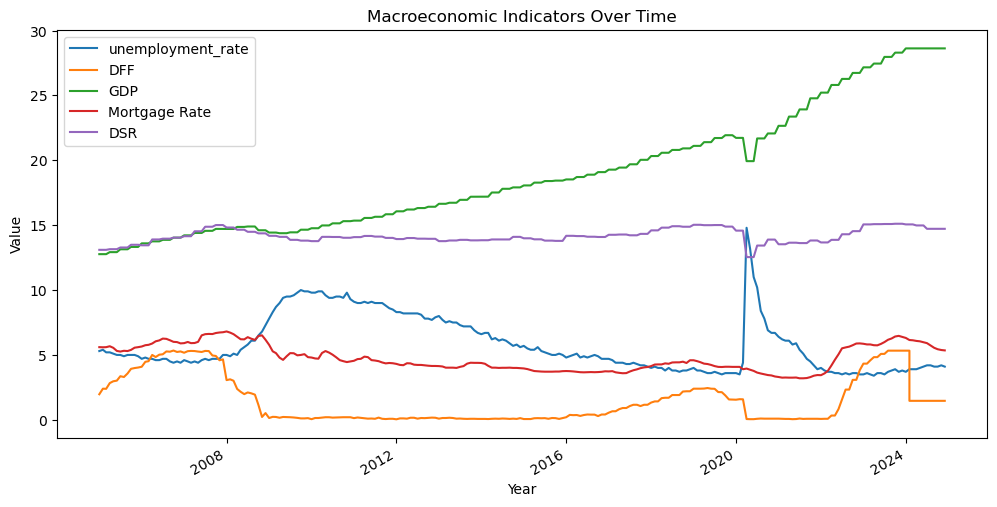

In [580]:
# Plot key economic indicators over time
data[['unemployment_rate', 'DFF', 'GDP', 'Mortgage Rate', 'DSR']].plot(figsize=(12,6))
plt.title("Macroeconomic Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()

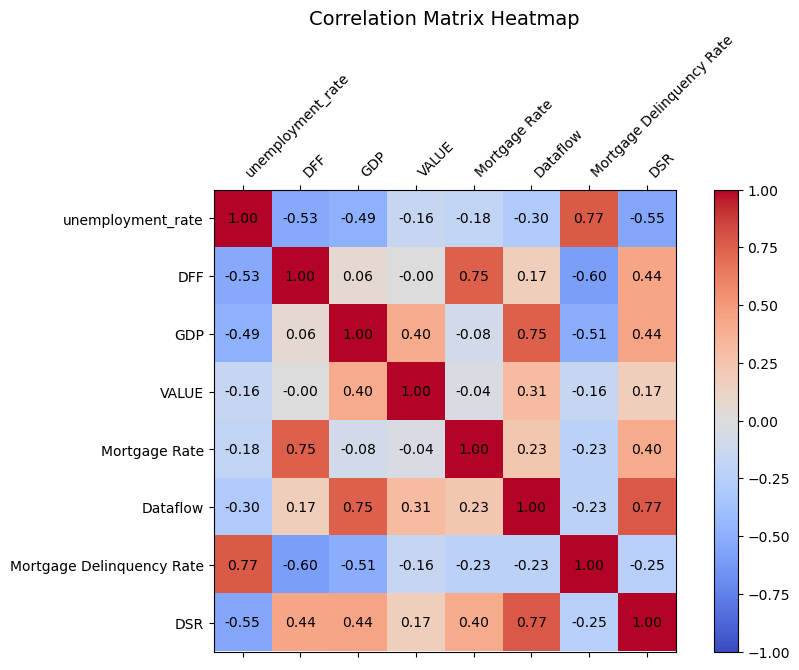

In [582]:
#Check Correlation Between Economic Factors & Mortgage Delinquency Rate
import seaborn as sns

# Compute correlation matrix
corr_matrix = data.corr().values
labels = data.corr().columns

# Set figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create heatmap
cax = ax.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add color bar
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="left", fontsize=10)
ax.set_yticklabels(labels, fontsize=10)

# Add text annotations manually
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f"{corr_matrix[i, j]:.2f}", ha="center", va="center", color="black", fontsize=10)

# Set title
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()


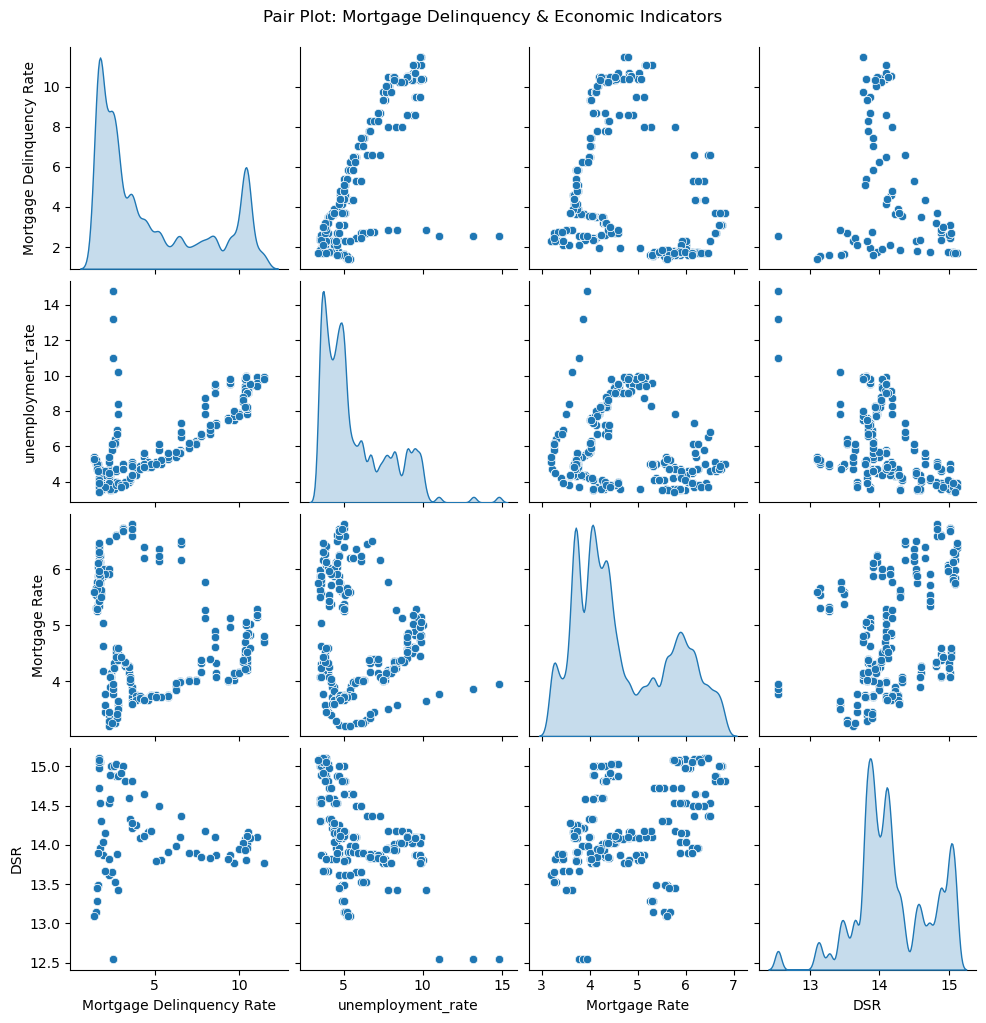

In [674]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key features
selected_features = ['Mortgage Delinquency Rate', 'unemployment_rate', 'Mortgage Rate', 'DSR']

# Pairplot
sns.pairplot(data[selected_features], diag_kind='kde')
plt.suptitle("Pair Plot: Mortgage Delinquency & Economic Indicators", y=1.02)
plt.show()


### Time-Series Forecasting Model

C:\Users\sumit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sumit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sumit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sumit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

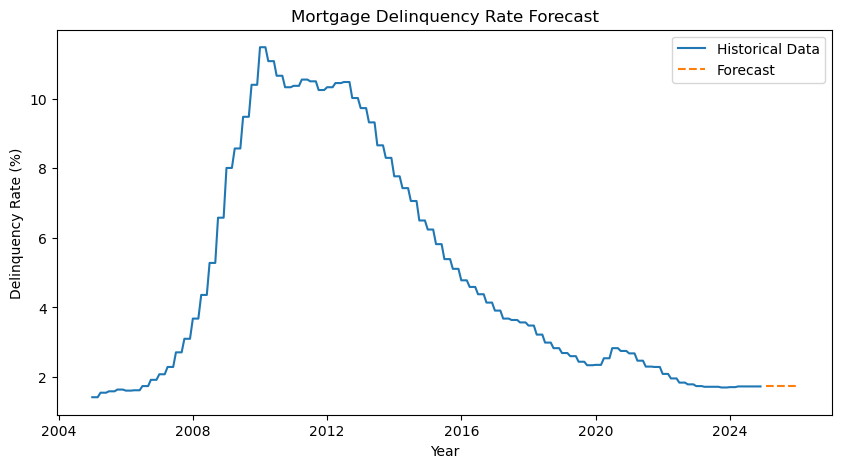

In [585]:
from statsmodels.tsa.arima.model import ARIMA

# Select target variable (Mortgage Delinquency Rate)
y = data["Mortgage Delinquency Rate"]

# Train ARIMA model (Auto-choose best parameters)
model = ARIMA(y, order=(5,1,0))  # (p,d,q) values (tune for better performance)
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(y, label="Historical Data")
plt.plot(pd.date_range(y.index[-1], periods=13, freq='M')[1:], forecast, label="Forecast", linestyle="dashed")
plt.title("Mortgage Delinquency Rate Forecast")
plt.xlabel("Year")
plt.ylabel("Delinquency Rate (%)")
plt.legend()
plt.show()


In [586]:
# Define risk levels based on delinquency rate
def classify_risk(rate):
    if rate < 2.0:
        return "Low"
    elif rate < 5.0:
        return "Medium"
    else:
        return "High"

# Apply classification
data['Risk Category'] = data['Mortgage Delinquency Rate'].apply(classify_risk)

# Display class distribution
print(data['Risk Category'].value_counts())


Risk Category
Medium    87783
High      80757
Low       50499
Name: count, dtype: int64


In [587]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Convert 'High', 'Medium', 'Low' to numerical values (0,1,2)
data['Risk Category'] = encoder.fit_transform(data['Risk Category'])

#📌 This will encode:'Low' → 0'Medium' → 1'High' → 2

### Train a Classification Model to Predict Mortgage Default Risk

In [638]:
X = data[['unemployment_rate', 'VALUE', 'Mortgage Rate', 'Dataflow', 'DSR']]
y = data['Risk Category']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=50,   # Reduce tree count
    max_depth=5,       # Prevent overfitting
    min_samples_split=10,  # Require more samples to split
    min_samples_leaf=4,   # Require more samples per leaf
    random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16151
           1       1.00      1.00      1.00     10100
           2       1.00      1.00      1.00     17557

    accuracy                           1.00     43808
   macro avg       1.00      1.00      1.00     43808
weighted avg       1.00      1.00      1.00     43808



In [593]:
print(X_train.head())  # Check training data
print(X_test.head())   # Check test data


            unemployment_rate  VALUE  Mortgage Rate  Dataflow    DSR
date                                                                
2010-11-01                9.8  134.6           4.45      12.8  14.03
2013-02-01                7.7   86.8           4.11      12.7  13.77
2006-02-01                4.8   96.5           5.75      11.6  13.45
2005-11-01                5.0  107.5           5.56      11.6  13.49
2005-11-01                5.0  120.3           5.56      11.6  13.49
            unemployment_rate  VALUE  Mortgage Rate  Dataflow    DSR
date                                                                
2017-11-01                4.2  130.0           4.04      13.1  14.33
2018-01-01                4.0  119.4           4.14      13.1  14.60
2006-08-01                4.7   94.2           6.24      12.1  13.96
2018-05-01                3.8   97.3           4.35      13.1  14.81
2005-03-01                5.2  102.4           5.60      11.2  13.10


In [620]:
from sklearn.utils import shuffle

# Shuffle before splitting
data = shuffle(data, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [622]:
print(X.columns)  # Ensure Risk Category is NOT in the features


Index(['unemployment_rate', 'Mortgage Rate', 'Dataflow', 'DSR'], dtype='object')


In [628]:
clf = RandomForestClassifier(
    n_estimators=30,  # Fewer trees
    max_depth=4,  # Lower depth
    min_samples_split=15,  # Higher sample requirement to split
    min_samples_leaf=5,  # More samples per leaf
    max_features=3,  # Limit features per split to reduce memorization
    random_state=42
)
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9957542001460921
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16151
           1       1.00      0.98      0.99     10100
           2       0.99      1.00      0.99     17557

    accuracy                           1.00     43808
   macro avg       1.00      0.99      1.00     43808
weighted avg       1.00      1.00      1.00     43808



In [630]:
clf = RandomForestClassifier(
    n_estimators=30,   # Reduce tree count
    max_depth=4,       # Limit tree depth
    min_samples_split=15,  # Require more samples to split
    min_samples_leaf=5,   # Require more samples per leaf
    max_features=2,  # Limit number of features used per split
    random_state=42
)
clf.fit(X_train, y_train)
# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9957542001460921
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16151
           1       1.00      0.98      0.99     10100
           2       0.99      1.00      0.99     17557

    accuracy                           1.00     43808
   macro avg       1.00      0.99      1.00     43808
weighted avg       1.00      1.00      1.00     43808



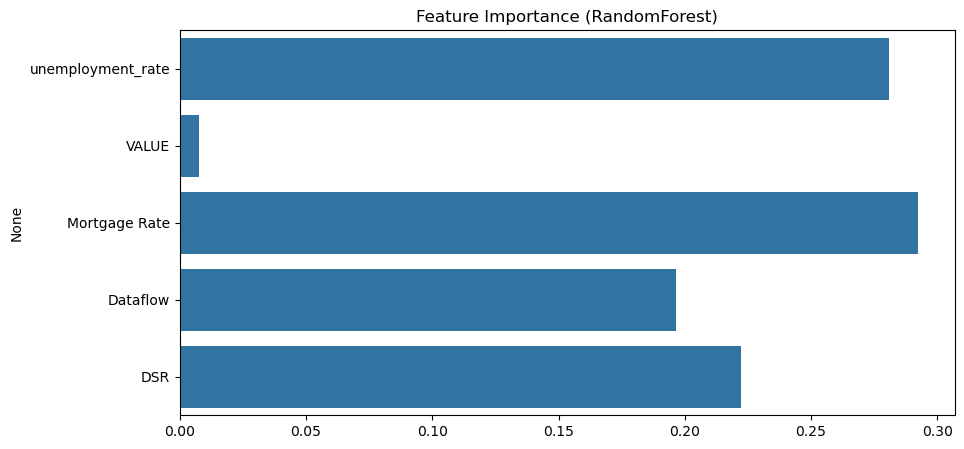

In [644]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = clf.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (RandomForest)")
plt.show()


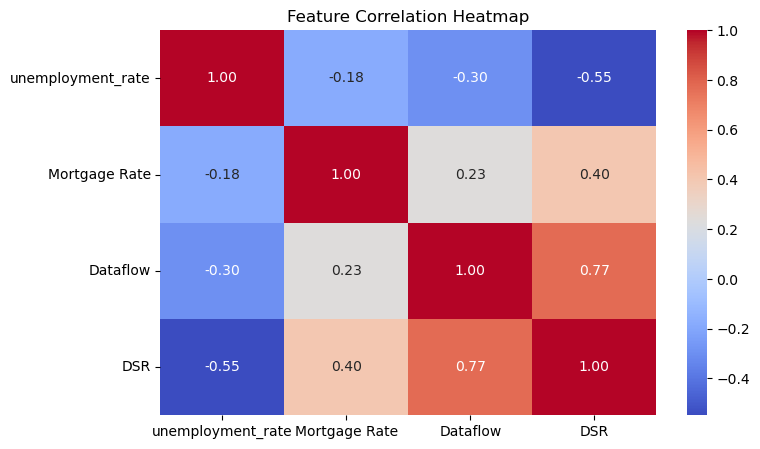

In [634]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
plt.figure(figsize=(8,5))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [646]:
X = X.drop(columns=['Dataflow','VALUE'])  # OR drop 'DSR' instead


In [650]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [656]:
X.head()

,unemployment_rate,Mortgage Rate,DSR
date,,,
2015-02-01,5.5,3.91,13.99
2013-06-01,7.5,4.00,13.82
2023-09-01,3.8,6.27,15.09
2009-07-01,9.5,5.14,13.87
2010-09-01,9.5,4.60,14.09


In [660]:
clf = RandomForestClassifier(
    n_estimators=30,   
    max_depth=4,       
    min_samples_split=20,  # Require more samples to split
    min_samples_leaf=7,   # Require more samples per leaf
    max_features=2,  
    random_state=42
)
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9771959459459459
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16151
           1       0.92      0.98      0.95     10100
           2       0.99      0.95      0.97     17557

    accuracy                           0.98     43808
   macro avg       0.97      0.98      0.97     43808
weighted avg       0.98      0.98      0.98     43808



In [662]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression Model
log_clf = LogisticRegression(max_iter=500)
log_clf.fit(X_train, y_train)

# SVM Model
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Evaluate
y_pred_log = log_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.8152620525931337
SVM Accuracy: 0.8116325785244705


In [664]:
from sklearn.ensemble import VotingClassifier

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', clf), 
        ('log', log_clf), 
        ('svm', svm_clf)
    ],
    voting='hard'  # Majority voting
)
ensemble_clf.fit(X_train, y_train)

y_pred_ensemble = ensemble_clf.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))


Ensemble Model Accuracy: 0.8376780496712929
